# Disentangled RNN Analysis
In this notebook, you can see how the latent variables are maintained inside the disentangled RNN. You can also see the validation and training loss over training.

In [1]:
from src import disrnn
from src import switch_utils
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_dir = '/Users/michaelcondon/workspaces/pbm_group2/disentangled_rnns/data/processed'
model_dir = "/Users/michaelcondon/workspaces/pbm_group2/disentangled_rnns/models/"

# choose mouse, beta and run time
model_name = 'disrnn'
train_prop = 0.7
param = 0.001
cv = f'{train_prop*100:.0f}-{(1-train_prop)*100:.0f}'
train_dt = "2025-04-18_00-24"
split_dt = "2025-04-17_10-28"
batch_size = 64

model_shape = {'dis_latent_size': 5,
                'tiny_latent_size': 2,
                'update_mlp_shape': (5,5,5),
                'choice_mlp_shape': (2,2),
                'obs_size': 2,
                'target_size': 2}

param_dict = {'disrnn': f'{param:.0e}', 'rnn': f'{param}'}
params_file = os.path.join(model_dir, f"params_{model_name}_{param_dict[model_name]}_{cv}_{train_dt}.json")
loss_file = os.path.join(model_dir, f"loss_{model_name}_{param_dict[model_name]}_{cv}_{train_dt}.csv")

df_tr = pd.read_csv(os.path.join(data_dir, f"train_df_{cv}_{split_dt}.csv"))
df_va = pd.read_csv(os.path.join(data_dir, f"validation_df_{cv}_{split_dt}.csv"))

params, losses = switch_utils.model_loader(params_file=params_file, loss_file=loss_file)

ds_tr = switch_utils.get_dataset(df_tr, batch_size)
ds_va = switch_utils.get_dataset(df_va, batch_size)


def make_network_eval():
    return disrnn.HkDisRNN(update_mlp_shape=model_shape['update_mlp_shape'],
                            choice_mlp_shape=model_shape['choice_mlp_shape'],
                            latent_size=model_shape['dis_latent_size'],
                            obs_size=model_shape['obs_size'], 
                            target_size=model_shape['target_size'],
                            eval_mode=True)




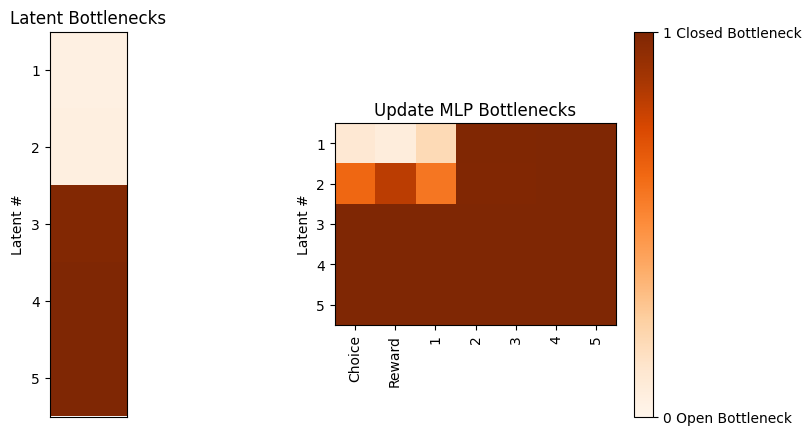

1 0 4 3


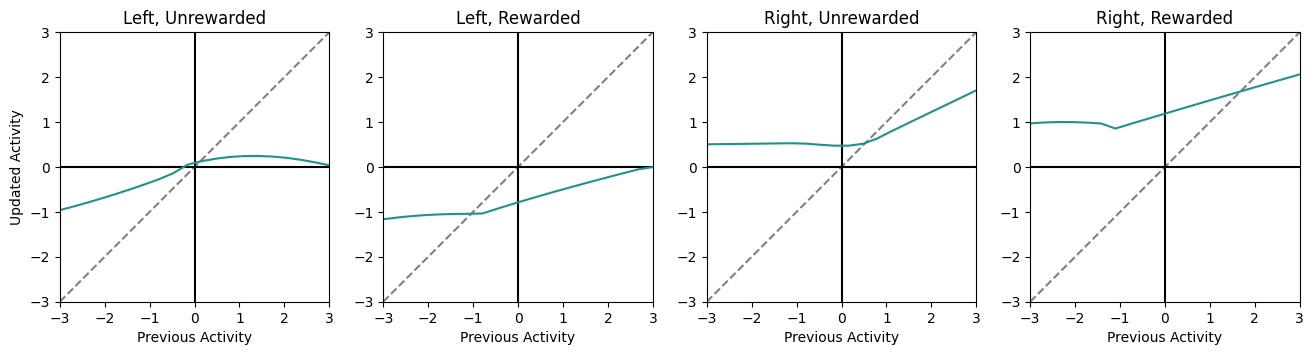

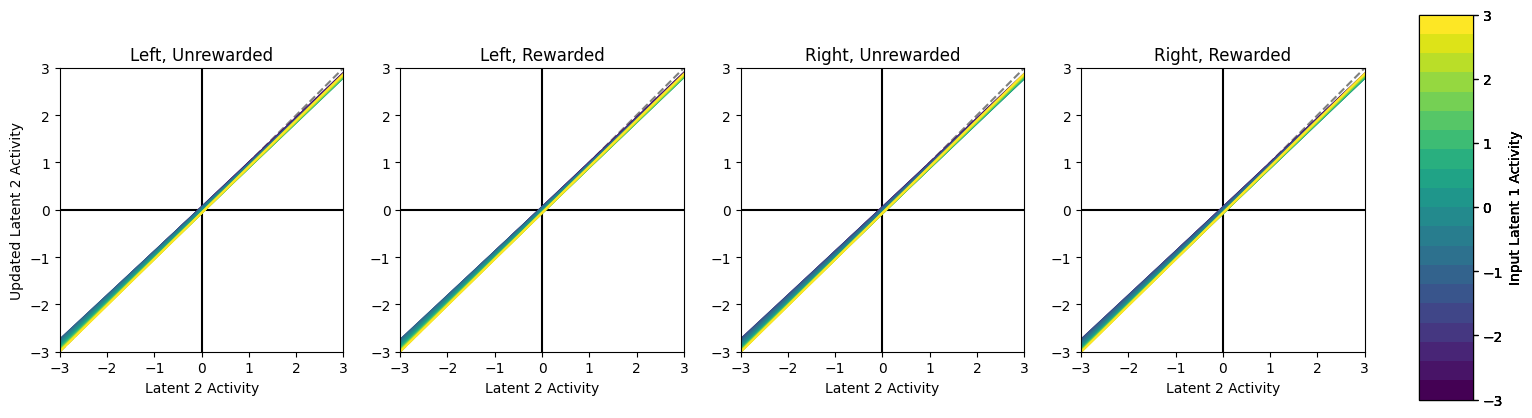

In [3]:
disrnn.plot_bottlenecks(params, sort_latents=True)
plt.show()
disrnn.plot_update_rules(params, make_network_eval)
plt.show()

## Training and validation loss.

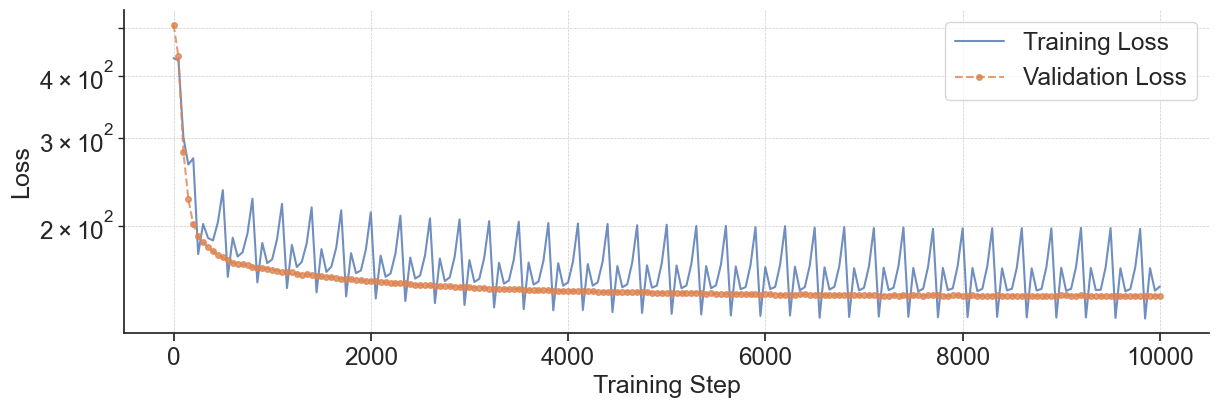

In [4]:
plt.figure(figsize=(14, 4.2))
sns.set_theme(style='ticks', font_scale=1.6, rc={'axes.labelsize':18, 'axes.titlesize':18}) 
plt.semilogy(losses.index*50, losses['training_loss'], label='Training Loss', alpha=0.8, color=sns.color_palette()[0])
plt.semilogy(losses.index*50, losses['validation_loss'], label='Validation Loss', linestyle='--', marker='o', markersize=4, alpha=0.8, color=sns.color_palette()[1])
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.show()